# Logistic Regression Example

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
class LogisticRegressionModel:
#1. hypothesis function
    def h(self, X, theta):      
        hypothesis = 1/(1+np.exp(-X@theta))
        return hypothesis
        
#2. cost function
    def cost(self, X, y, theta, average = False):
        #expects X to be a design matrix, y to be a column vector and theta to be a column vector
        if(average == False):
            J = -(y.T@np.log(self.h(X,theta)) + (1-y).T@np.log(1-self.h(X,theta)))
        else:
            J = -(y.T@np.log(self.h(X,theta)) + (1-y).T@np.log(1-self.h(X,theta)))/(X.shape[0])
        return J

#3. gradient function
    def gradient(self, X, y, theta, average = False):
        if(average == False):
            dJ = -X.T@(y-self.h(X,theta))
        else:
            dJ = -X.T@(y-self.h(X,theta))/(X.shape[0])
        return dJ
    
    def hessian(self, X, theta, average = False):
        y_pred = self.h(X,theta)
        if(average == False):
            hess_mat = X.T@X*(y_pred@(1-y_pred))
        else:
            hess_mat = X.T@X*(y_pred@(1-y_pred))/X.shape[0]
        return hess_mat
    
#4. batch gradient descent
    def batch_gd(self, X, y, initial_theta, max_iteration, alpha, tolerance = 0,average = False):
        cost = []
        theta = initial_theta
        iteration = 0
        cost.append(self.cost(X,y,theta,average))
        for n in range(max_iteration):
            gradient = self.gradient(X,y,theta,average)
            theta = theta - alpha*gradient
            cost.append(self.cost(X,y,theta,average))
            iteration += 1
        cost = np.array(cost)
        return theta,cost,iteration
    
    def newtons_method(self, X, y, initial_theta, max_iteration,average = False):
        cost = []
        theta = initial_theta
        iteration = 0
        cost.append(self.cost(X,y,theta,average))
        for n in range(max_iteration):
            gradient = self.gradient(X,y,theta,average)
            hessian = self.hessian(X,theta,average)
            theta = theta - np.linalg.inv(hessian)@gradient
            cost.append(self.cost(X,y,theta,average))
            iteration += 1
        cost = np.array(cost)
        return theta,cost,iteration
    
#5. predict
    def predict(self,X,theta):
        prediction = self.h(X,theta)
        prediction[prediction >= 0.5] = 1
        prediction[prediction < 0.5] = 0
        return prediction
    
#6. score/error calculation
    def r_squared(self,y,y_pred):
        r_square = 1 - ((np.square(y - y_pred)).sum())/((np.square(y - y.mean())).sum())
        return r_square
    
    def accuracy(self,y,y_pred):
        acc = (y == y_pred).sum()/y.size
        return acc
    
#7. plotting cost
    def plot_cost(self,cost, iteration_no):
        iteration_series = np.arange(0,iteration_no+1)
        ax = plt.axes()
        ax.plot(iteration_series, cost)

In [3]:
def standardScaler(X):
    mean = np.mean(X,axis=0)
    std = np.std(X,axis=0)
    X_norm = (X-mean)/std
    return X_norm, mean, std

def standardUnScaler(X, mean, std):
    X_unscaled = X*std+mean
    return X_unscaled

### Load the data

In [10]:
data = np.loadtxt('../ex2data1.txt',delimiter = ',')
X = data[:,0:2]
y = data[:,2]

X,mean,std = standardScaler(X)

X = np.insert(X,0,1,axis=1)

### Create an instance of the Logistic Regression Class

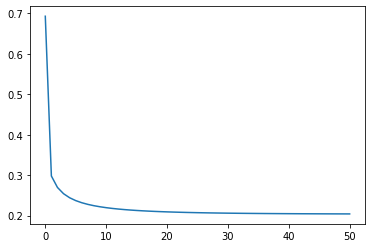

In [14]:
Log = LogisticRegressionModel()

### Perform Batch GD

In [16]:
iterations = 50
alpha = 5
initial_theta = np.zeros(3)

theta,cost,iteration_no = Log.batch_gd(X,y,initial_theta,iterations,alpha,average=True)

### Plot the cost

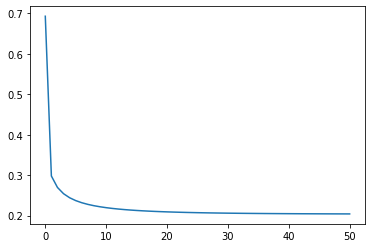

In [17]:
Log.plot_cost(cost,iteration_no)

### Prediction and Accuracy

In [15]:
y_pred = Log.predict(X,theta)
Log.accuracy(y,y_pred)

0.89